<a href="https://colab.research.google.com/github/vccalvin33/DPhi_AdvancedMLBootcamp/blob/main/Data_Preparation_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd                  # A fundamental package for linear algebra and multidimensional arrays
import numpy as np                   # Data analysis and data manipulating tool
import random                        # Library to generate random numbers
from collections import Counter      # Collection is a Python module that implements specialized container datatypes providing 
                                     # Counter is a dict subclass for counting hashable objects
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)

### Titanic dataset from Kaggle
https://www.kaggle.com/c/titanic/data

We have uploaded the dataset on GitHub so its raw link can be used directly as below:

In [2]:
# import training data
train = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_data.csv')
train.shape

# the data has 12 columns and 891 rows in the training set

(891, 12)

In [3]:
# import test data
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_test.csv')
test.shape

# the data has 11 columns and 418 rows in the test set
# one column less because the target variable will 
# not be there in the test set)

(418, 11)

In [4]:
# know the list of columns along with their data type
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# look at the first few rows of the data to understand the contents
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# detect columns with missing values - train data
train_count_of_missval_by_col = (train.isnull().sum())
# print('------------ all columns along with count of missing values ------------')
# print(train_count_of_missval_by_col)
print('------------ only columns which has missing values ------------')
print(train_count_of_missval_by_col[train_count_of_missval_by_col > 0])
print('------------ proportion of the missing data to total observations ------------')
print(train_count_of_missval_by_col[train_count_of_missval_by_col > 0]/train.shape[0])

------------ only columns which has missing values ------------
Age         177
Cabin       687
Embarked      2
dtype: int64
------------ proportion of the missing data to total observations ------------
Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64


In [8]:
# detect columns with missing values - test data
test_count_of_missval_by_col = (test.isnull().sum())
# print('------------ all columns along with count of missing values ------------')
# print(test_count_of_missval_by_col)
print('------------ only columns which has missing values ------------')
print(test_count_of_missval_by_col[test_count_of_missval_by_col > 0])
print('------------ proportion of the missing data to total observations ------------')
print(test_count_of_missval_by_col[test_count_of_missval_by_col > 0]/test.shape[0])

------------ only columns which has missing values ------------
Age       86
Fare       1
Cabin    327
dtype: int64
------------ proportion of the missing data to total observations ------------
Age      0.205742
Fare     0.002392
Cabin    0.782297
dtype: float64


In [9]:
# describe funtion takes all numeric columns and provide descriptive statistics on them
train.describe()

# Note1: PassengerId is an index column and is irrelevant in our model
# Note2: Survived and Pclass are categorical variables but treated as numeric while importing

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# pandasgui
# from pandasgui import show
# gui = show(train)

In [10]:
# value_counts() reveals the unique number of values in a column along with the frequency - let us look at string columns
train['Sex'].value_counts()
train['Embarked'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# are the classes balanced? look at the target variable and understand the proportion - let us look at target variable
# 0 = did not survive
# 1 = survived
train['Survived'].value_counts()
train['Survived'].value_counts(normalize=True)

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [12]:
# Drop irrelevant columns - Ticket and Name (may be passenger ID too - if not set it as index)
del train['Name']
del train['Ticket']
del train['PassengerId']

# Code for using the PassengerId column as index
# train = train.set_index('PassengerId')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [13]:
# missing values - too many missing values - drop the column
# del train['Cabin']

# missing values - few missing columns - delete the rows with missing values - Fare column has zeros
train.shape
train = train[train['Fare'] != 0]
train.shape

(891, 9)

(876, 9)

In [14]:
# missing values - numeric - impute with mean in column age
from sklearn.impute import SimpleImputer # Importing imputer from sklearn

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(train[['Age']])
train['Age'] = mean_imputer.transform(train[['Age']]).ravel()

# missing values - categorical - impute with mode (most frequent)
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(train[['Embarked']])
train['Embarked'] = mode_imputer.transform(train[['Embarked']]).ravel()

# alternative method - missing values - categorical - impute with mode (constant)
# const_imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value = 'A')
# const_imputer = const_imputer.fit(train[['Embarked']])
# train['Embarked'] = const_imputer.transform(train[['Embarked']]).ravel()

In [15]:
# Standard deviation method for Age
age_mean = train['Age'].mean()
age_std = train['Age'].std()
age_3std_low = -3*age_std
age_3std_high = 3*age_std

age_mean
age_std
age_3std_low
age_3std_high

filt_outliers_train = train[(train['Age'] < age_3std_low) & (train['Age'] > age_3std_high)]
filt_outliers_train.head()

29.645219236209233

13.077539516985102

-39.23261855095531

39.23261855095531

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [16]:
# Standard deviation method for Fare
Fare_mean = train['Fare'].mean()
Fare_std = train['Fare'].std()
Fare_3std_low = -3*Fare_std
Fare_3std_high = 3*Fare_std

Fare_mean
Fare_std
Fare_3std_low
Fare_3std_high

filt_outliers_train = train[(train['Fare'] < Fare_3std_low) & (train['Fare'] > Fare_3std_high)]
filt_outliers_train.head()

32.75564988584471

49.93682576210329

-149.81047728630986

149.81047728630986

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [17]:
# IQR method
def out_iqr(s, k=1.5, return_thresholds=False):
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    print(lower, upper)
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

2.5 54.5


(66, 10)

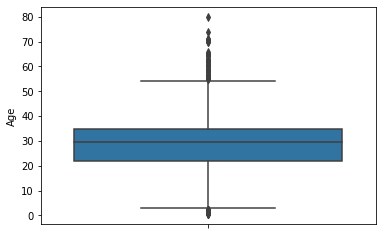

In [18]:
# IQR for Age
train['outlier_age'] = out_iqr(train['Age'])
train[train['outlier_age'] == True].shape

# boxplot with 1.5 whiskers
sns.boxplot(y='Age', data = train, whis=1.5)

-27.099999999999998 66.3


(116, 11)

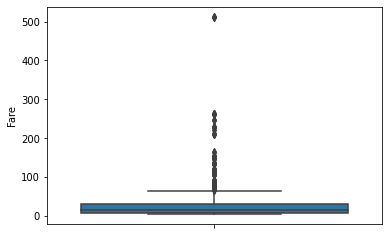

In [19]:
# IQR for Fare
train['outlier_Fare'] = out_iqr(train['Fare'])
train[train['outlier_Fare'] == True].shape

# boxplot with 1.5 whiskers
sns.boxplot(y='Fare', data = train, whis=1.5)

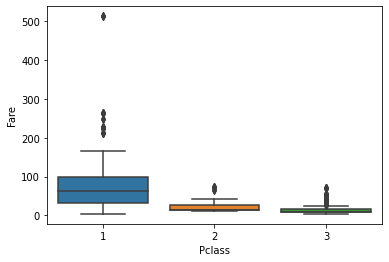

In [20]:
# multivariate outlier - fare and class in comparison
sns.boxplot(x='Pclass', y='Fare', data = train, whis=1.5)

In [21]:
# Top coding
train.loc[train.Fare>66.3,'Fare'] = 66.3

# Bottom / Zero coding - no impact - refer only to the code
train.loc[train.Fare<0,'Fare'] = 0

train['Fare'].min()
train['Fare'].max()

4.0125

66.3

In [22]:
# Equal width binning - width = (max value — min value) / N
age_range = train.Age.max() - train.Age.min()
min_value = int(np.floor(train.Age.min()))
max_value = int(np.ceil(train.Age.max()))
 
# let's round the bin width
inter_value = int(np.round(age_range/10))
 
min_value, max_value, inter_value

(0, 80, 8)

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]
['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5', 'Bin_6', 'Bin_7', 'Bin_8', 'Bin_9', 'Bin_10']


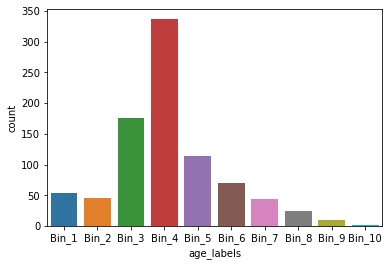

In [23]:
intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
print(intervals)
print(labels)

train['age_labels'] = pd.cut(x = train.Age, bins=intervals, labels=labels, include_lowest=True)
train['age_interval'] = pd.cut(x = train.Age, bins=intervals, include_lowest=True)
# data.head(5)

sns.countplot(train.age_labels)

In [24]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,outlier_age,outlier_Fare,age_labels,age_interval
0,0,3,male,22.000000,1,0,7.250,NaN,S,False,False,Bin_3,"(16.0, 24.0]"
1,1,1,female,38.000000,1,0,66.300,C85,C,False,True,Bin_5,"(32.0, 40.0]"
2,1,3,female,26.000000,0,0,7.925,NaN,S,False,False,Bin_4,"(24.0, 32.0]"
3,1,1,female,35.000000,1,0,53.100,C123,S,False,False,Bin_5,"(32.0, 40.0]"
4,0,3,male,35.000000,0,0,8.050,NaN,S,False,False,Bin_5,"(32.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.000,NaN,S,False,False,Bin_4,"(24.0, 32.0]"
887,1,1,female,19.000000,0,0,30.000,B42,S,False,False,Bin_3,"(16.0, 24.0]"
888,0,3,female,29.645219,1,2,23.450,NaN,S,False,False,Bin_4,"(24.0, 32.0]"
889,1,1,male,26.000000,0,0,30.000,C148,C,False,False,Bin_4,"(24.0, 32.0]"


## Class imbalance example 

In [25]:
# importing the fraud dataset
fraud_data = pd.read_csv("imbalanced_classes/fraud_data.csv")

FileNotFoundError: ignored

In [ ]:
# take a look at the data
fraud_data.shape
fraud_data.head()

(59054, 434)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0    57049
1     2005
Name: isFraud, dtype: int64

0    96.604802
1     3.395198
Name: isFraud, dtype: float64

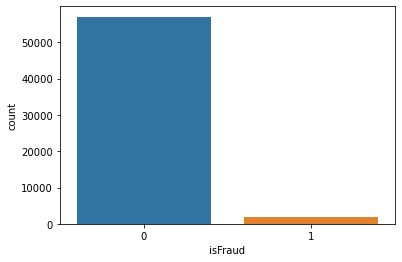

In [ ]:
# Taking a look at the target variable
fraud_data.isFraud.value_counts()
fraud_data.isFraud.value_counts(normalize=True) * 100
sns.countplot(fraud_data.isFraud)

In [ ]:
# Missing values
fraud_data.isnull().sum() / len(fraud_data) * 100   # To get percentage of missing data in each column

# # Will keep those columns which has missing values less than 20%
# fraud_data = fraud_data[fraud_data.columns[fraud_data.isnull().mean() < 0.2]]

# filling missing values of numerical columns with mean value.
num_cols = fraud_data.select_dtypes(include=np.number).columns      # getting all the numerical columns
fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean())   # fills the missing values with mean

# getting all the categorical columns
cat_cols = fraud_data.select_dtypes(include = 'object').columns    

# fills the missing values with maximum occuring element in the column
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0]) 

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.549429
card3              0.267552
card4              0.274325
card5              0.751854
card6              0.269245
addr1             11.392962
addr2             11.392962
dist1             59.865547
dist2             93.443289
P_emaildomain     15.934568
R_emaildomain     76.572290
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.204897
D2                47.336336
D3                44.391574
D4                28.526433
D5                52

In [ ]:
# Let's have a look if there still exist any missing values
fraud_data.isnull().sum() / len(fraud_data) * 100

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
card1             0.0
card2             0.0
card3             0.0
card4             0.0
card5             0.0
card6             0.0
addr1             0.0
addr2             0.0
dist1             0.0
dist2             0.0
P_emaildomain     0.0
R_emaildomain     0.0
C1                0.0
C2                0.0
C3                0.0
C4                0.0
C5                0.0
C6                0.0
C7                0.0
C8                0.0
C9                0.0
C10               0.0
C11               0.0
C12               0.0
C13               0.0
C14               0.0
D1                0.0
D2                0.0
D3                0.0
D4                0.0
D5                0.0
D6                0.0
D7                0.0
D8                0.0
D9                0.0
D10               0.0
D11               0.0
D12               0.0
D13               0.0
D14               0.0
D15       

## One hot encoding

In [ ]:
# earlier we have collected all the categorical columns in cat_cols
fraud_data.shape
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])
fraud_data = pd.get_dummies(fraud_data, columns=cat_cols)
fraud_data.shape
fraud_data.head()

(59054, 434)

(59054, 1667)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,...,0,0,1,0,0,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,...,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,...,0,0,0,0,0,0,0,0,0,0


## Feature transformation

In [ ]:
# Separate input features and output feature
# input features
X = fraud_data.drop(columns = ['isFraud'])       

# output feature
Y = fraud_data.isFraud      

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

# Let's see how the data looks after scaling
scaled_features.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,-1.688548,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,1.224253e-16,...,-0.00582,-0.004115,67.391508,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
1,1.615662,1.681426,-0.073540,-0.406928,-1.078794,-0.286861,-0.804662,-1.144356,0.077832,1.582320e+00,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
2,0.266093,0.219070,-0.258976,0.585989,0.881042,2.788641,0.605139,-0.069441,-10.788933,1.224253e-16,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
3,-0.959645,-1.032167,1.140478,0.491581,1.188468,-0.286861,-0.099761,1.569022,0.077832,1.224253e-16,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
4,1.043171,1.053404,-0.438389,-0.185621,0.580022,-0.286861,0.653753,-0.278162,0.077832,-4.551081e-01,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115


## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# X_train: independent feature data for training the model
# Y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# Y_test: original target values of X_test; We will compare this values with our predicted values.
 
# test_size = 0.3: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

## Dealing with imbalanced data

### Over sampling minority class

In [ ]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

# separate minority and majority class
not_fraud = train_data[train_data.isFraud==0]
fraud = train_data[train_data.isFraud==1]

In [ ]:
# Unsample minority; we are oversampling the minority class to match the number of majority classs
fraud_upsampled = resample(fraud,
                           replace = True, # Sample with replacement
                           n_samples = len(not_fraud), # Match number in majority class
                           random_state=27)

In [ ]:
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [ ]:
# Now let's check the classes count
upsampled.isFraud.value_counts()

# We can notice here after resampling we have an equal ratio of data points for each class!

1    39942
0    39942
Name: isFraud, dtype: int64

### Under sampling majority class

In [ ]:
# we are still using our separated class i.e. fraud and not_fraud from above
# Again we are removing the observations of the majority class to mathch the number of minority class
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27)

In [ ]:
# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])    # Concatenation

In [ ]:
# let's check the classes counts
downsampled.isFraud.value_counts()

# we have an equal ratio of fraud to not fraud data points, but in this case 
# a much smaller quantity of data to train the model on.

1    1395
0    1395
Name: isFraud, dtype: int64

### SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   # again we are eqalizing both the classes

In [ ]:
# fit the sampling
X_train, Y_train = sm.fit_sample(X_train, Y_train)